Shape: (40607, 9)
Columns: Index(['Unnamed: 0', 'text', 'rating', 'category', 'product_name',
       'product_id', 'sold', 'shop_id', 'product_url'],
      dtype='object')

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40607 entries, 0 to 40606
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    40607 non-null  int64 
 1   text          40607 non-null  object
 2   rating        40607 non-null  int64 
 3   category      40607 non-null  object
 4   product_name  40607 non-null  object
 5   product_id    40607 non-null  int64 
 6   sold          40593 non-null  object
 7   shop_id       40607 non-null  int64 
 8   product_url   40607 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.8+ MB
None

--- Null Values ---
Unnamed: 0       0
text             0
rating           0
category         0
product_name     0
product_id       0
sold            14
shop_id          0
product_

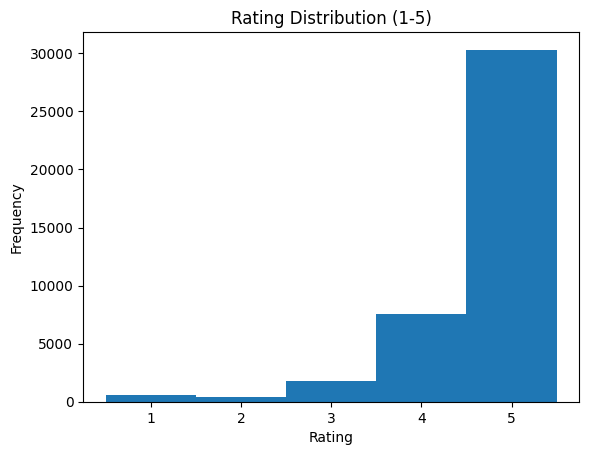

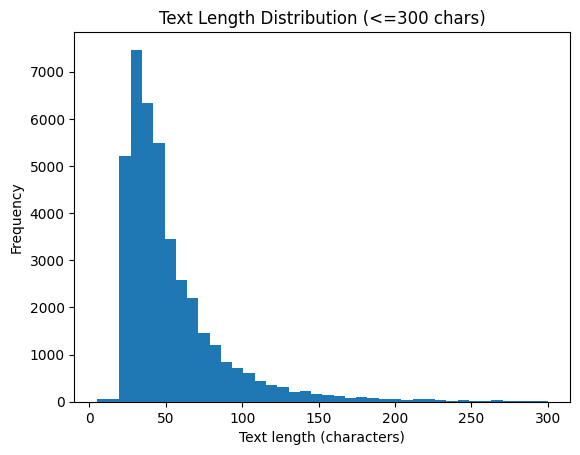


--- Distribusi Sentiment ---
sentiment
pos    37857
neu     1825
neg      925
Name: count, dtype: int64
Dataset cleaned disimpan ke tokopedia_reviews_clean.csv


,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url,text_len,sentiment
0,1,Barang sesuai pesanan dan cepat sampai,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1,1740837,https://www.tokopedia.com/shakaonline87/staple...,38,pos
1,2,Barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...,24,pos
2,3,Paket rapi...mantap....cepat....sampe ke tujuan,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...,47,pos
3,4,ya saya puas dgn barangnya,5,pertukangan,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,102279869,5,771395,https://www.tokopedia.com/kamarmesin/alat-stap...,26,pos
4,5,Responya luar biasa b mantap,5,pertukangan,Isi Refill Staples Jok Kulit Motor / Staple Gu...,190679689,787,969999,https://www.tokopedia.com/mitrapersada/isi-ref...,28,pos


In [2]:
# ================================
# 1. Setup & Import
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

# ================================
# 2. Load Dataset
# ================================
df = pd.read_csv("tokopedia-product-reviews-2019.csv", on_bad_lines="skip", encoding="utf-8")

print("Shape:", df.shape)
print("Columns:", df.columns)

df.head()

# ================================
# 3. EDA Singkat
# ================================
print("\n--- Info Dataset ---")
print(df.info())

print("\n--- Null Values ---")
print(df.isna().sum())

# Tambahkan panjang teks
df["text_len"] = df["text"].astype(str).str.len()

print("\n--- Statistik Panjang Review ---")
print(df["text_len"].describe())

# Distribusi rating
print("\n--- Distribusi Rating ---")
print(df["rating"].value_counts())

# ================================
# 4. Plot Distribusi Rating & Panjang Review
# ================================
plt.figure()
df["rating"].astype(int).plot(kind="hist", bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.title("Rating Distribution (1-5)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

plt.figure()
df.loc[df["text_len"] <= 300, "text_len"].plot(kind="hist", bins=40)
plt.title("Text Length Distribution (<=300 chars)")
plt.xlabel("Text length (characters)")
plt.ylabel("Frequency")
plt.show()

# ================================
# 5. Buat Label Sentiment (berdasarkan rating)
# rule: rating <=2 = neg, 3 = neu, >=4 = pos
# ================================
def map_sentiment(r):
    try:
        r = int(r)
    except:
        return np.nan
    if r <= 2:
        return "neg"
    elif r == 3:
        return "neu"
    else:
        return "pos"

df["sentiment"] = df["rating"].apply(map_sentiment)

print("\n--- Distribusi Sentiment ---")
print(df["sentiment"].value_counts())

# ================================
# 6. Simpan versi bersih
# ================================
keep_cols = ["text","rating","sentiment","category","product_name",
             "product_id","sold","shop_id","product_url","text_len"]

df_clean = df[keep_cols].copy()
df_clean.to_csv("tokopedia_reviews_clean.csv", index=False)
print("Dataset cleaned disimpan ke tokopedia_reviews_clean.csv")

df.head()

                                              text  rating sentiment  \
0           Barang sesuai pesanan dan cepat sampai       5       pos   
1                         Barang bagus harga murah       5       pos   
2  Paket rapi...mantap....cepat....sampe ke tujuan       5       pos   

      category                                       product_name  product_id  \
0  pertukangan  Staples Dekorasi Staples Kayu + Refill 8mm - S...   418660637   
1  pertukangan  STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...   416032545   
2  pertukangan  STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...   416032545   

  sold  shop_id                                        product_url  text_len  
0    1  1740837  https://www.tokopedia.com/shakaonline87/staple...        38  
1   11  1477109  https://www.tokopedia.com/juraganperkakas/stap...        24  
2   11  1477109  https://www.tokopedia.com/juraganperkakas/stap...        47  
sentiment
pos    34628
neu     1762
neg      911
Name: count, dtype: i

<Figure size 640x480 with 0 Axes>

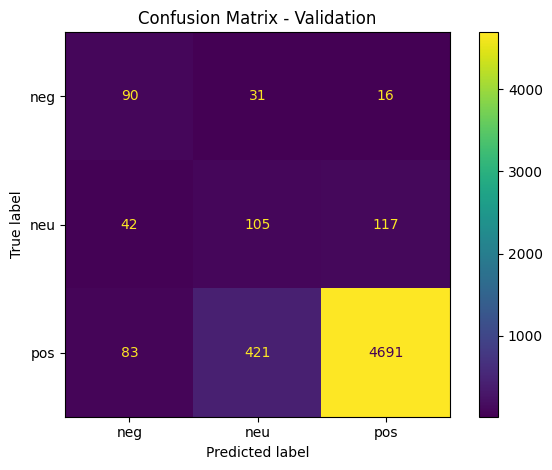


=== TEST SET REPORT ===
              precision    recall  f1-score   support

         neg     0.3467    0.5693    0.4309       137
         neu     0.1426    0.3106    0.1955       264
         pos     0.9666    0.8924    0.9280      5195

    accuracy                         0.8570      5596
   macro avg     0.4853    0.5908    0.5181      5596
weighted avg     0.9126    0.8570    0.8813      5596



<Figure size 640x480 with 0 Axes>

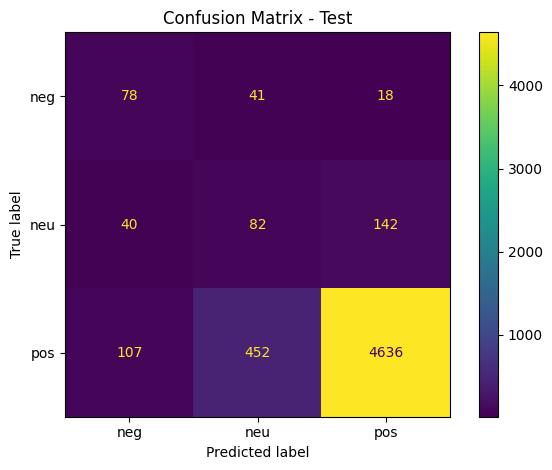

Saved: artefacts/sentiment_lr_pipeline_20250917-131735.joblib
[pos] Barangnya bagus, pengiriman cepat banget. Recommended!
[neu] Biasa aja sih. Tidak terlalu sesuai ekspektasi.
[neg] Parah, barang rusak dan penjual susah dihubungi.


In [3]:
# ================================
# 0) Library
# ================================
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import os, json, time

# Repro
RSEED = 42
np.random.seed(RSEED)

# ================================
# 1) Load data bersih
# ================================
df = pd.read_csv("tokopedia_reviews_clean.csv")

# Pastikan kolom tersedia
assert set(["text","sentiment"]).issubset(df.columns), "Kolom 'text'/'sentiment' tidak ditemukan."

# Drop NA/duplikat minimal
df = df.dropna(subset=["text","sentiment"]).drop_duplicates(subset=["text"]).reset_index(drop=True)
print(df.head(3))
print(df["sentiment"].value_counts())

# ================================
# 2) Train/Val/Test split (stratified)
# ================================
X = df["text"].astype(str).values
y = df["sentiment"].astype(str).values

# train 70%, val 15%, test 15%
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=RSEED, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=RSEED, stratify=y_temp
)  # 0.1765 * 0.85 ≈ 0.15

print(f"Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")

# ================================
# 3) Pipeline TF-IDF + Logistic Regression
#    - class_weight='balanced' biar imbang antar kelas
#    - sublinear_tf=True buat handle kata frekuensi tinggi
# ================================
pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        ngram_range=(1,2),
        min_df=2,
        max_df=0.95,
        sublinear_tf=True
    )),
    ("clf", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        n_jobs=None # ignored by LR liblinear/saga; biarin default
    ))
])

# ================================
# 4) GridSearch (hiperparameter sederhana)
# ================================
param_grid = {
    "clf__C": [0.5, 1.0, 2.0, 4.0],
    "clf__solver": ["lbfgs", "saga"],  # saga support l1/l2, lbfgs l2
    # tambahkan l1 penalty opsional
    # "clf__penalty": ["l2"]  # kalau mau l1, tambahkan "l1" dan solver="saga"
}
gs = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1,
    verbose=1
)

gs.fit(X_train, y_train)
print("Best params:", gs.best_params_)
print("Best CV score (macro-F1):", gs.best_score_)

# ================================
# 5) Evaluasi di VAL set
# ================================
best_model = gs.best_estimator_

y_val_pred = best_model.predict(X_val)
print("\n=== VAL SET REPORT ===")
print(classification_report(y_val, y_val_pred, digits=4))

cm_val = confusion_matrix(y_val, y_val_pred, labels=["neg","neu","pos"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=["neg","neu","pos"])
plt.figure()
disp.plot(values_format="d")
plt.title("Confusion Matrix - Validation")
plt.tight_layout()
plt.show()

# ================================
# 6) Evaluasi FINAL di TEST set
# ================================
y_test_pred = best_model.predict(X_test)
print("\n=== TEST SET REPORT ===")
print(classification_report(y_test, y_test_pred, digits=4))

cm_test = confusion_matrix(y_test, y_test_pred, labels=["neg","neu","pos"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["neg","neu","pos"])
plt.figure()
disp.plot(values_format="d")
plt.title("Confusion Matrix - Test")
plt.tight_layout()
plt.show()

# ================================
# 7) Simpan artefak model (pipeline) + meta
# ================================
os.makedirs("artefacts", exist_ok=True)
stamp = time.strftime("%Y%m%d-%H%M%S")
model_path = f"artefacts/sentiment_lr_pipeline_{stamp}.joblib"
joblib.dump(best_model, model_path)

meta = {
    "created_at": stamp,
    "model_path": model_path,
    "algo": "TFIDF+LogReg",
    "params": gs.best_params_,
    "classes": ["neg","neu","pos"],
    "notes": "Baseline sentiment Tokopedia"
}
with open(f"artefacts/metadata_{stamp}.json","w") as f:
    json.dump(meta, f, indent=2)

print("Saved:", model_path)

# ================================
# 8) Quick inference helper
# ================================
def predict_sentiment(texts):
    """texts: list[str]"""
    loaded = joblib.load(model_path)
    preds = loaded.predict(texts)
    proba = None
    # cek apakah model punya predict_proba
    try:
        proba = loaded.predict_proba(texts)
    except Exception:
        pass
    return preds, proba

# Contoh pakai:
samples = [
    "Barangnya bagus, pengiriman cepat banget. Recommended!",
    "Biasa aja sih. Tidak terlalu sesuai ekspektasi.",
    "Parah, barang rusak dan penjual susah dihubungi."
]
preds, prob = predict_sentiment(samples)
for i, s in enumerate(samples):
    print(f"[{preds[i]}] {s}")


In [4]:
# ================================
# 0) Setup
# ================================
!pip install replicate

import os, json, time, math, re
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics import classification_report, f1_score

from google.colab import userdata
os.environ["REPLICATE_API_TOKEN"] = userdata.get("REPLICATE_API_TOKEN")


import replicate

MODEL_SLUG = "ibm-granite/granite-3.3-8b-instruct"
print("Using model:", MODEL_SLUG)
print("Token length:", len(os.environ["REPLICATE_API_TOKEN"]))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.9 MB/s eta 0:00:00
Using model: ibm-granite/granite-3.3-8b-instruct
Token length: 40


In [5]:
# ================================
# 1) Load data bersih
# ================================
df = pd.read_csv("tokopedia_reviews_clean.csv")

# Kita pakai label 'sentiment' (neg/neu/pos) yang diturunkan dari rating
df = df.dropna(subset=["text","sentiment"]).drop_duplicates(subset=["text"]).reset_index(drop=True)

# Subset kecil dulu saat test koneksi (hemat kredit & waktu)
df_small = df.sample(60, random_state=42).reset_index(drop=True)
df_small["text"] = df_small["text"].astype(str)

df_small.head(3)


,text,rating,sentiment,category,product_name,product_id,sold,shop_id,product_url,text_len
0,Fast respon barang bagus nyampenya jg cepet wa...,5,pos,elektronik,Crimping Tool RJ45 RJ11 Tang Krimping Tools RJ 45,178037848,622,2048686,https://www.tokopedia.com/multikomputer201/cri...,116
1,"Barang mantap,bagus,cepat maruh lagi",5,pos,fashion,Exsport Willow Vert Backpack - Black,438933595,6,3824760,https://www.tokopedia.com/eigerindostore/exspo...,36
2,Barang bagus sekali bos,5,pos,elektronik,"KABEL HDMI TO HDMI 1,5M FLAT VERSI 1.4 3D 1080...",238227850,92,2048686,https://www.tokopedia.com/multikomputer201/kab...,23


In [6]:
# ================================
# 2) Helper: Prompt & parsing output
# ================================
SENTINEL = {"neg","neu","pos"}

FEW_SHOT = """You are a sentiment classifier for Indonesian e-commerce product reviews.
Output ONLY one of: neg, neu, pos (lowercase).
Guidelines:
- neg: keluhan, kecewa, rusak, telat, tidak sesuai.
- neu: biasa saja, netral, antara puas dan tidak puas.
- pos: puas, bagus, sesuai, cepat, rekomendasi.

Contoh:
Review: "Barangnya jelek, kardus penyok, penjual slow response."
Label: neg

Review: "Biasa aja sih, sesuai harga."
Label: neu

Review: "Mantap, barang ori, pengiriman cepat. Recommended!"
Label: pos
"""

def build_prompt(review_text: str) -> str:
    return FEW_SHOT + f'\n\nReview: "{review_text}"\nLabel:'

def normalize_label(model_text: str) -> str:
    # Ambil token pertama yang mirip neg/neu/pos
    if not isinstance(model_text, str):
        return "neu"
    text = model_text.strip().lower()
    # ambil kata pertama / token yang relevan
    m = re.search(r"(neg|neu|pos)", text)
    return m.group(1) if m else "neu"


In [7]:
# ================================
# 3) Single-call test (sanity check)
# ================================
test_text = "Barangnya bagus, pengiriman cepat dan sesuai deskripsi."
out = replicate.run(MODEL_SLUG, input={"prompt": build_prompt(test_text)})
# Output bisa berupa list tokens atau string, handle keduanya
if isinstance(out, list):
    out = "".join(out)
print("RAW:", out)
print("PARSED:", normalize_label(out))


RAW: pos
PARSED: pos


In [8]:
# ================================
# 4) Batch inference (mini-batching + retry)
# NOTE: Replicate punya rate limit; kita batch kecil2 dan kasih retry.
# ================================
def granite_predict_labels(texts, model_slug=MODEL_SLUG, max_retries=3, sleep_base=2.0):
    preds = []
    for t in tqdm(texts):
        attempt = 0
        while True:
            try:
                out = replicate.run(model_slug, input={"prompt": build_prompt(t)})
                if isinstance(out, list):
                    out = "".join(out)
                preds.append(normalize_label(out))
                break
            except Exception as e:
                attempt += 1
                if attempt > max_retries:
                    # fallback: kalau error terus, kasih 'neu'
                    preds.append("neu")
                    break
                time.sleep(sleep_base * attempt)
    return preds

texts = df_small["text"].tolist()
y_true = df_small["sentiment"].tolist()

y_pred = granite_predict_labels(texts)
df_small["granite_pred"] = y_pred

print(df_small[["text","sentiment","granite_pred"]].head(10))
print("\nMacro-F1 (sample):", f1_score(y_true, y_pred, average="macro"))
print("\nReport:\n", classification_report(y_true, y_pred, digits=4))


100%|██████████| 60/60 [01:06<00:00,  1.11s/it]

                                                text sentiment granite_pred
0  Fast respon barang bagus nyampenya jg cepet wa...       pos          pos
1               Barang mantap,bagus,cepat maruh lagi       pos          pos
2                            Barang bagus sekali bos       pos          pos
3               Barang telah saya terima.Terimakasih       pos          neu
4                    Barang sesuai pesanan mantullll       pos          pos
5  sendalnya bagus. sesuai deskripsi dan orderan....       pos          pos
6  sama seperti pic......terima kasih pengiriman ...       pos          neu
7           Barang bisa dipakai dan sesuai deskripsi       pos          neu
8  Barang original pengiriman sangat cepat..harga...       pos          pos
9                      sip, cepat, murce, dan sesuai       pos          pos

Macro-F1 (sample): 0.45066540672493893

Report:
               precision    recall  f1-score   support

         neg     0.5000    1.0000    0.6667         1
     

In [9]:
# ================================
# 5) Evaluasi skala lebih besar
# ================================
N = 1000
df_eval = df.sample(min(N, len(df)), random_state=123).reset_index(drop=True)
y_true_eval = df_eval["sentiment"].tolist()
pred_eval = granite_predict_labels(df_eval["text"].tolist())

print("Macro-F1 (N={}):".format(len(df_eval)), f1_score(y_true_eval, pred_eval, average="macro"))
print(classification_report(y_true_eval, pred_eval, digits=4))
df_eval["granite_pred"] = pred_eval
df_eval.to_csv("granite_predictions_eval.csv", index=False)


100%|██████████| 1000/1000 [17:28<00:00,  1.05s/it]

Macro-F1 (N=1000): 0.4384611086201023
              precision    recall  f1-score   support

         neg     0.4231    0.7857    0.5500        28
         neu     0.0612    0.6383    0.1117        47
         pos     0.9869    0.4886    0.6537       925

    accuracy                         0.5040      1000
   macro avg     0.4904    0.6376    0.4385      1000
weighted avg     0.9276    0.5040    0.6253      1000



In [10]:
# ================================
# 6) Summarization (Insight per-Produk / per-Kategori)
# Kita ambil 100 review per kategori/produk, minta Granite rangkum keluhan & pujian utama
# ================================
def summarize_reviews(reviews, model_slug=MODEL_SLUG, max_chars=6000):
    # gabung review jadi blok panjang, tapi batasi karakter biar aman
    block = "\n- " + "\n- ".join(reviews)
    block = block[:max_chars]
    prompt = f"""
You are an analyst. Read these Indonesian e-commerce reviews (bullet points) and produce:
1) Top 3 complaints (singkat, poin-poin)
2) Top 3 positives (singkat, poin-poin)
3) One actionable recommendation

Output in Indonesian, concise.

Reviews:
{block}
"""
    out = replicate.run(model_slug, input={"prompt": prompt})
    if isinstance(out, list):
        out = "".join(out)
    return out.strip()

# Contoh: per-kategori
cat = df["category"].value_counts().index[0]
sample_reviews = df.loc[df["category"]==cat, "text"].astype(str).head(120).tolist()
summary_cat = summarize_reviews(sample_reviews)
print(f"== Ringkasan kategori: {cat} ==")
print(summary_cat)

with open(f"summary_category_{cat}.txt","w", encoding="utf-8") as f:
    f.write(summary_cat)


== Ringkasan kategori: elektronik ==
1. Top 3 complaints:
   - Seller mengirimkan warna yang tidak sesuai dengan pesanan (ditemukan 2 kali).
   - Keterlambatan pengiriman yang diluar harapan (ditemukan 2 kali).
   - Kualitas barang yang hanya "ok" atau "sesuai deskripsi" (ditemukan 6 kali).

2. Top 3 positives:
   - Seller respons cepat dan ramah (ditemukan 10 kali).
   - Pengiriman cepat dan sesuai harapan (ditemukan 9 kali).
   - Barang sampai dengan kondisi baik dan sesuai pesanan (ditemukan 13 kali).

3. Actionable recommendation:
Perbaiki sistem pengiriman dan pastikan warna yang diinginkan oleh konsumen diberikan dengan benar. Selain itu, perlu dilakukan pengembangan kualitas produk untuk memenuhi harapan konsumen Indonesia.
